In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Most Popular Genres Based on Average Popularity of Tracks

/var/folders/h4/wqc_qm2d5pj56hdj9_y0rx_w0000gn/T/ipykernel_8293/4001771759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='track_genre', y='avg_popularity', data=most_popular_genres, palette='viridis')


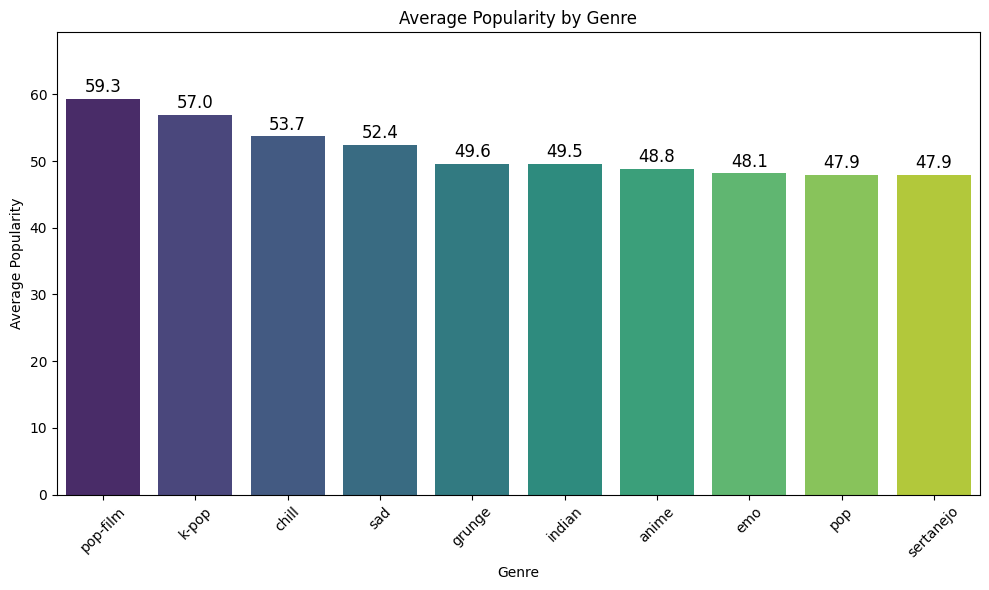

In [3]:
most_popular_genres = pd.read_csv('outputs/most_popular_genres/000000_0', header=None, names=['track_genre', 'avg_popularity'])
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='track_genre', y='avg_popularity', data=most_popular_genres, palette='viridis')
# Add title and labels
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.ylim(0, most_popular_genres['avg_popularity'].max() + 10)
# Add annotations above each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'),  # format the number to 1 decimal place
                      (p.get_x() + p.get_width() / 2., p.get_height()),  # position
                      ha='center', va='bottom',  # horizontal and vertical alignment
                      fontsize=12, color='black',  # text style
                      xytext=(0, 2),  # text offset
                      textcoords='offset points')  # offset coordinates

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

### Solo Artists with the most Tracks

/var/folders/h4/wqc_qm2d5pj56hdj9_y0rx_w0000gn/T/ipykernel_8293/3002114237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_count', y='artists', data=solo_artists, palette='coolwarm')


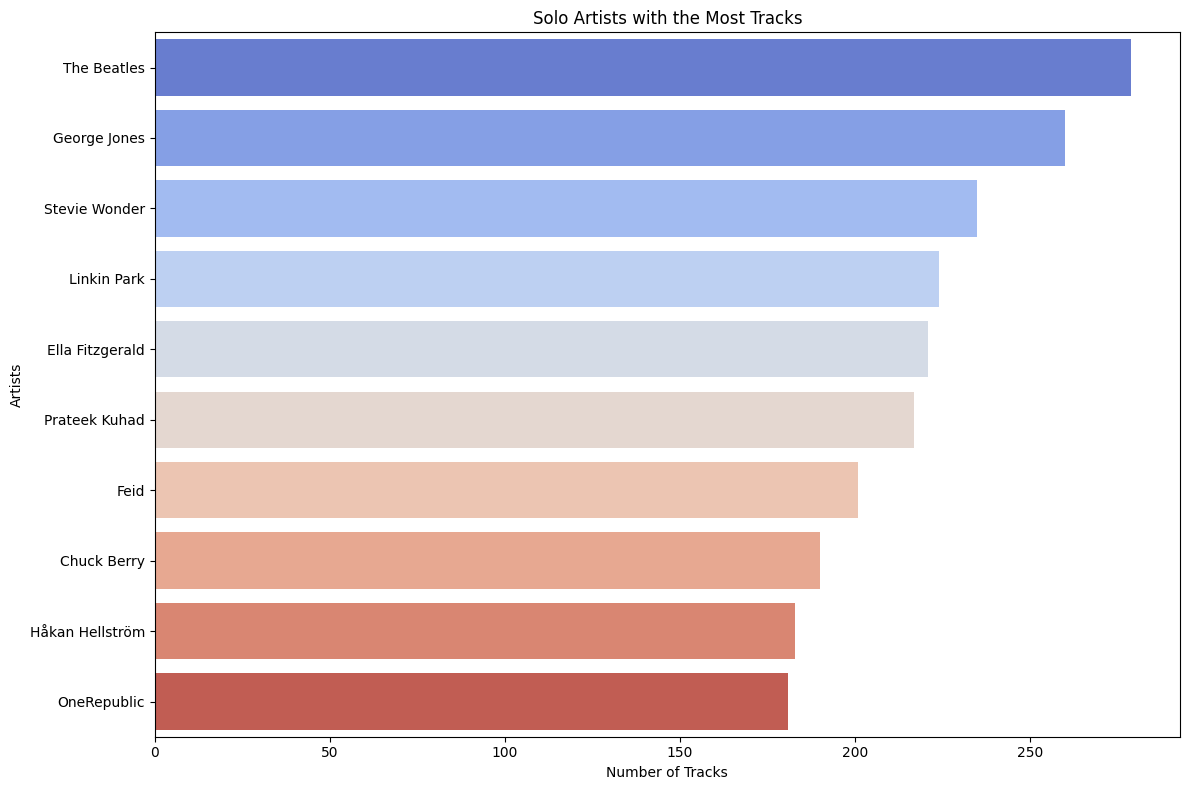

In [4]:
# Create the horizontal bar plot
solo_artists = pd.read_csv('outputs/solo_artists/000000_0', header=None, names=['artists', 'track_count'])
plt.figure(figsize=(12, 8))
sns.barplot(x='track_count', y='artists', data=solo_artists, palette='coolwarm')
plt.title('Solo Artists with the Most Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artists')
plt.tight_layout()
plt.show()

### Genres with the Largest Difference Between Explicit and Non-Explicit Track Popularity

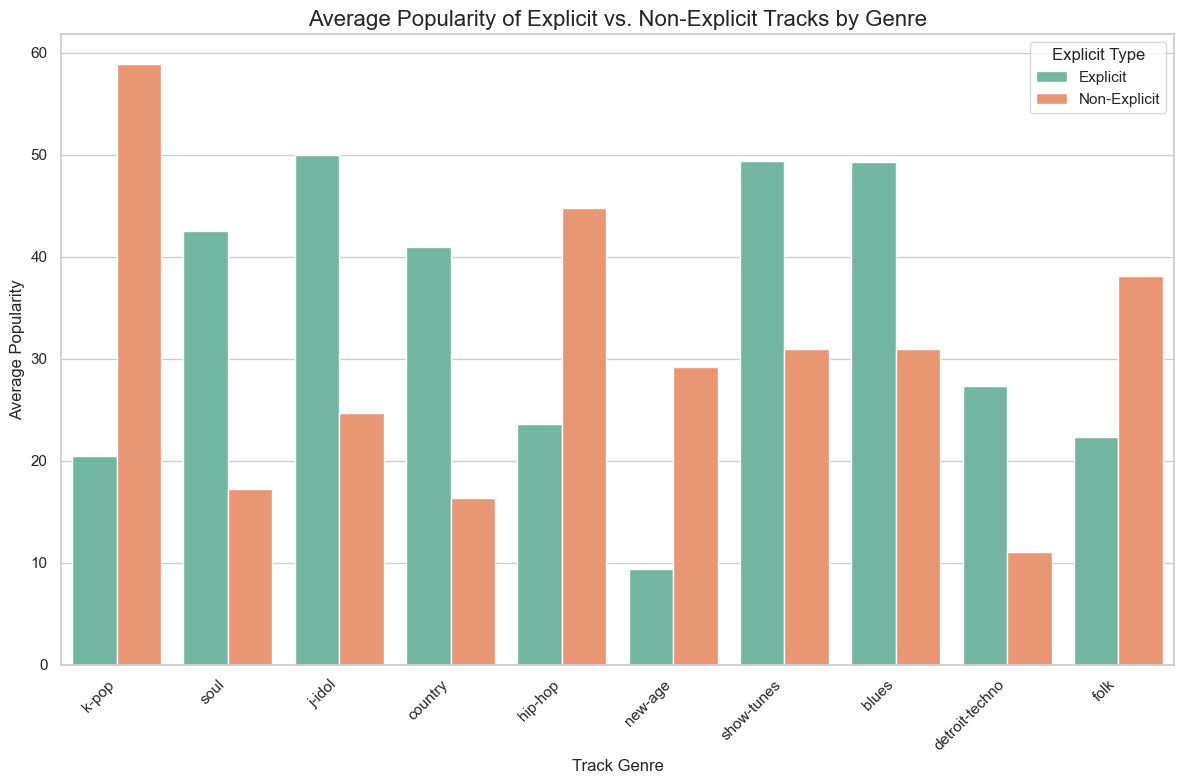

In [5]:
popularity_explicit_vs_nonexplicit = pd.read_csv('outputs/explicit_nonexplicit_diff_pop/000000_0', header=None, names=['track_genre', 'avg_popularity_explicit', 'avg_popularity_non_explicit', 'popularity_diff'])
# Convert any \N or missing values to NaN (if not already done automatically)
popularity_explicit_vs_nonexplicit.replace('\\N', pd.NA, inplace=True)

# Drop rows with missing values to ensure clean plotting
popularity_explicit_vs_nonexplicit.dropna(inplace=True)

# Ensure that the columns for average popularity are numeric
popularity_explicit_vs_nonexplicit['avg_popularity_explicit'] = pd.to_numeric(popularity_explicit_vs_nonexplicit['avg_popularity_explicit'], errors='coerce')
popularity_explicit_vs_nonexplicit['avg_popularity_non_explicit'] = pd.to_numeric(popularity_explicit_vs_nonexplicit['avg_popularity_non_explicit'], errors='coerce')

# Drop rows with NaN values again after conversion
popularity_explicit_vs_nonexplicit.dropna(inplace=True)

# Set plot size and style before melting the DataFrame
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Melt the dataframe for easier plotting with seaborn
df_melt = popularity_explicit_vs_nonexplicit.melt(id_vars='track_genre', 
                                                   value_vars=['avg_popularity_explicit', 'avg_popularity_non_explicit'], 
                                                   var_name='Explicit Type', 
                                                   value_name='Average Popularity')

# Rename the 'Explicit Type' values for better display
df_melt['Explicit Type'] = df_melt['Explicit Type'].map({'avg_popularity_explicit': 'Explicit', 
                                                         'avg_popularity_non_explicit': 'Non-Explicit'})

# Create a grouped bar chart
sns.barplot(x='track_genre', y='Average Popularity', hue='Explicit Type', data=df_melt, palette='Set2')

# Add titles and labels
plt.title('Average Popularity of Explicit vs. Non-Explicit Tracks by Genre', fontsize=16)
plt.xlabel('Track Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Use tight_layout to adjust spacing
plt.tight_layout()

# Show the plot
plt.show()


### Comparison of Average Energy for High vs. Low Popularity Tracks by Genre

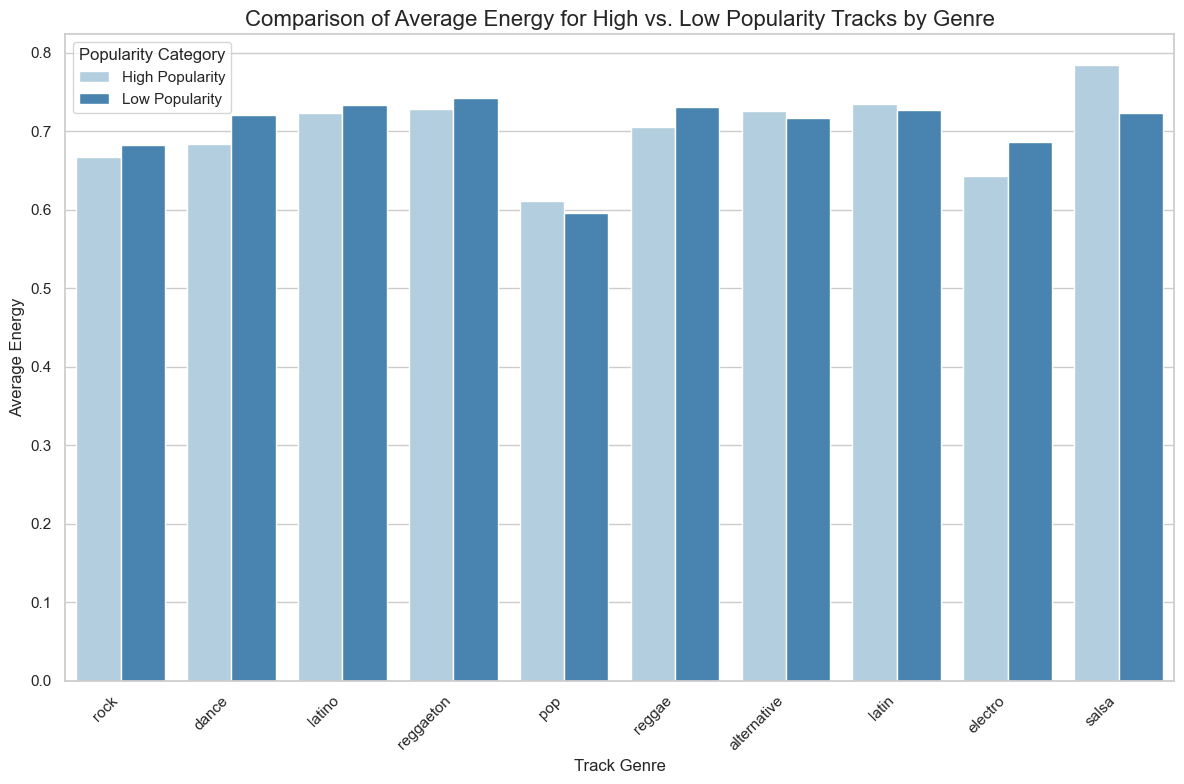

In [9]:
energy_comparison_by_genre = pd.read_csv('outputs/energy_comparison_by_genre/000000_0', header=None, names=['track_genre', 'high_popular_avg_energy', 'low_popular_avg_energy'])
# Melt the DataFrame to make it easier to plot with seaborn
df_melt = pd.melt(energy_comparison_by_genre, id_vars='track_genre', 
                  value_vars=['high_popular_avg_energy', 'low_popular_avg_energy'], 
                  var_name='Popularity Category', 
                  value_name='Average Energy')

# Rename 'Popularity Category' for better display
df_melt['Popularity Category'] = df_melt['Popularity Category'].map({'high_popular_avg_energy': 'High Popularity', 
                                                                     'low_popular_avg_energy': 'Low Popularity'})

# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='track_genre', y='Average Energy', hue='Popularity Category', data=df_melt, palette='Blues')

# Add titles and labels
plt.title('Comparison of Average Energy for High vs. Low Popularity Tracks by Genre', fontsize=16)
plt.xlabel('Track Genre', fontsize=12)
plt.ylabel('Average Energy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Average Danceability of Genres with Tracks Having Popularity Greater Than 70

/var/folders/h4/wqc_qm2d5pj56hdj9_y0rx_w0000gn/T/ipykernel_8293/2044845794.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_danceability', y='track_genre', data=danceability_comparison_by_genre, palette='viridis')


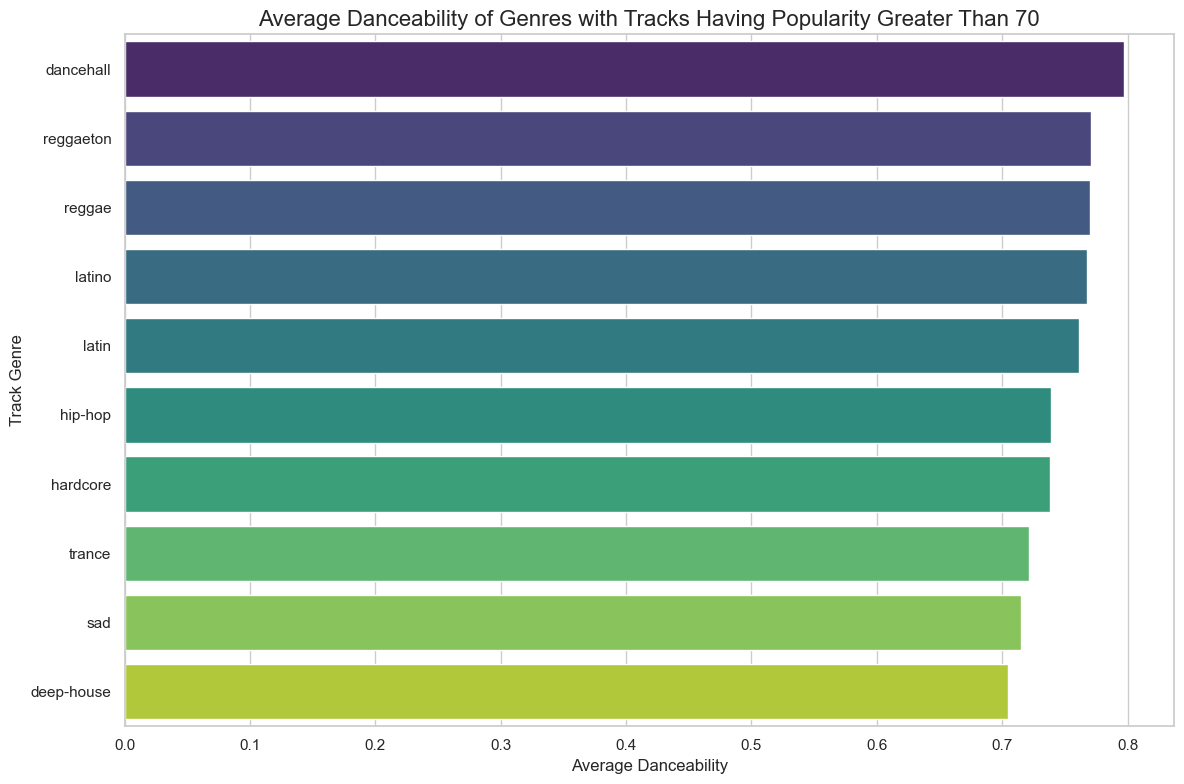

In [10]:
# Load the output of query 5 into a DataFrame (assuming the CSV file has been saved)
danceability_comparison_by_genre = pd.read_csv('outputs/danceability_comparison_by_genre/000000_0', header=None, names=['track_genre', 'avg_danceability'])

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='avg_danceability', y='track_genre', data=danceability_comparison_by_genre, palette='viridis')

# Add titles and labels
plt.title('Average Danceability of Genres with Tracks Having Popularity Greater Than 70', fontsize=16)
plt.xlabel('Average Danceability', fontsize=12)
plt.ylabel('Track Genre', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
